# Final Progress Report

- Author: Teresa Davison
- Email: tid30@pitt.edu
- Class/Professor: LING1340 Na-Rae Han
- Date: Apr 27, 2024

This is a continuation from progress reports 1-3. Here I will get the most important features from models and create visualizations for the final report and presentation. There are interactive maps included in this notebook. Since github cannot render them properly, to see them go to [this link](https://nbviewer.org/github/Data-Science-for-Linguists-2024/Colexification-Across-the-Globe/blob/main/notebooks/Final_pr.ipynb) to view them with nbviewer.

## Table of contents
1. [Visualizations](#Visualizations)
2. [Models](#Models)
    1. [Semantic field, macroarea](#semantic-field-as-X,-macroarea-as-y)
    2. [Clustering with K-means, 3 clusters](#Clustering-with-K-means,-3-clusters)
    3. [Semantic field, language family](#semantic-field-as-X,-language-family-as-y)
    4. [Clustering with K-means, 8 clusters](#Clustering-with-K-means,-8-clusters)

In [1]:
#load necessary packages
import pickle
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Load the dataframes from the pickle object (in my private directory)
l_df = pd.read_pickle("../private/l_df.pkl")
p_df = pd.read_pickle("../private/p_df.pkl")
f_df = pd.read_pickle("../private/f_df.pkl")
dfs = pd.read_pickle("../private/pr3_dfs.pkl")
feature_df = pd.read_pickle("../private/feature_df.pkl")
sample_df = pd.read_pickle("../private/sample_df.pkl")

# Visualizations

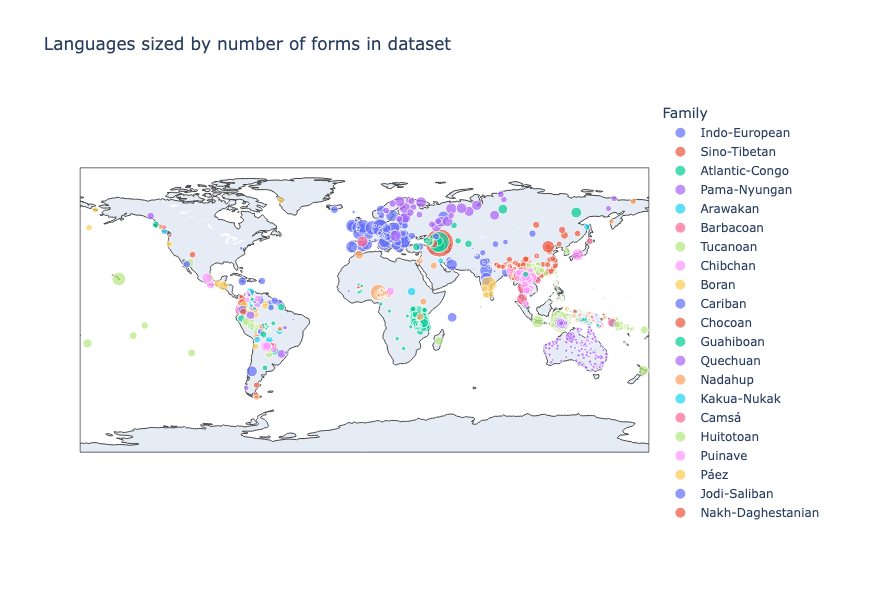

In [3]:
fig = px.scatter_geo(l_df, lat='Latitude', lon='Longitude', color='Family',
                     hover_name='Glottolog_Name', size='Form_count',
                     title='Languages sized by number of forms in dataset', width=870, height=600)
fig.show()

In [4]:
ont = pd.DataFrame(p_df.Ontological_Category.value_counts())
ont = ont.reset_index()
ont.head()

Ontological_Category  count
0         Person/Thing  10195
1       Action/Process   4777
2             Property   2144
3                Other   1297
4               Number    479

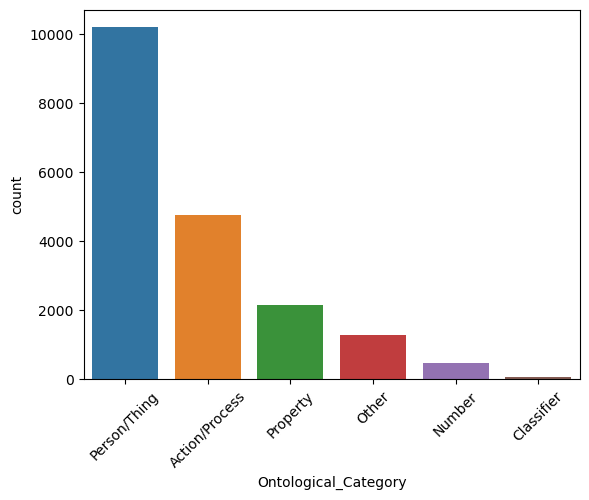

In [5]:
sns.barplot(x = 'Ontological_Category',y = 'count',data = ont)
plt.xticks(rotation=45)
plt.show()

In [6]:
sem = pd.DataFrame(p_df.Semantic_Field.value_counts())
sem = sem.reset_index()
sem.head()

Semantic_Field  count
0                      The body   2568
1                       Animals   1610
2  Basic actions and technology   1386
3            The physical world   1210
4             Spatial relations   1195

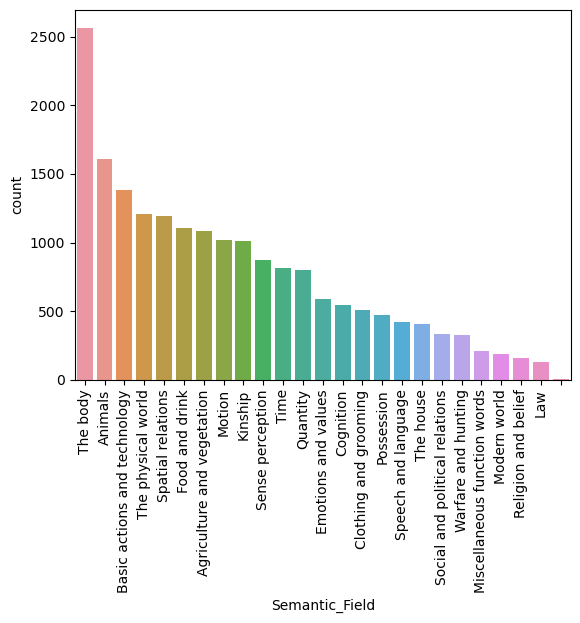

In [7]:
sns.barplot(x = 'Semantic_Field',y = 'count',data = sem)
plt.xticks(rotation=90)
plt.show()

# Models
## Subsections:
1. [Semantic field, macroarea](#semantic-field-as-X,-macroarea-as-y)
2. [Clustering with K-means, 3 clusters](#Clustering-with-K-means,-3-clusters)
3. [Semantic field, language family](#semantic-field-as-X,-language-family-as-y)
4. [Clustering with K-means, 8 clusters](#Clustering-with-K-means,-8-clusters)

   
## semantic field as X, macroarea as y
### Naive Bayes
I can get the most important features to see which pairs of semantic fields correlate with which macroareas.

In [8]:
#get rid of north and south america since there are so few entries
feature_df = feature_df[(feature_df.Macroarea != 'South America') & (feature_df.Macroarea != 'North America')]

In [9]:
#semantic field as X, macroarea as y
X_train, X_test, y_train, y_test = train_test_split(feature_df.loc[:,'Agriculture and vegetation:Agriculture and vegetation':'Warfare and hunting:Warfare and hunting']
                                                    , feature_df.Macroarea, test_size=0.4, random_state=0)
mnb = MultinomialNB()
y_pred = mnb.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

0.7831325301204819


In [10]:
def print_top(feats, clf, n):
    """Prints features with the highest log probability values, per class"""
    class_labels = clf.classes_
    for i, class_label in enumerate(class_labels):
        top = np.argsort(clf.feature_log_prob_[i])[0-n:][::-1]
        print("%s: %s" % (class_label,
              ", ".join(feats[j].replace(' ', '_') for j in top)))

In [11]:
#top 10 features for each macroarea
print_top(list(feature_df.columns.values.tolist())[3:303], mnb, 10)

Africa: Kinship:Kinship, The_body:The_body, Basic_actions_and_technology:Basic_actions_and_technology, The_physical_world:The_physical_world, Animals:Animals, Food_and_drink:Food_and_drink, Motion:Motion, Spatial_relations:Spatial_relations, Emotions_and_values:Emotions_and_values, Food_and_drink:The_body
Eurasia: Kinship:Kinship, The_body:The_body, Animals:Animals, The_physical_world:The_physical_world, Spatial_relations:Spatial_relations, Food_and_drink:Food_and_drink, Motion:Motion, Basic_actions_and_technology:Basic_actions_and_technology, Agriculture_and_vegetation:Agriculture_and_vegetation, Time:Time
Papunesia: The_body:The_body, Kinship:Kinship, The_physical_world:The_physical_world, Basic_actions_and_technology:Basic_actions_and_technology, Motion:Motion, Cognition:Cognition, Possession:Possession, Spatial_relations:The_body, Time:Time, Animals:Animals


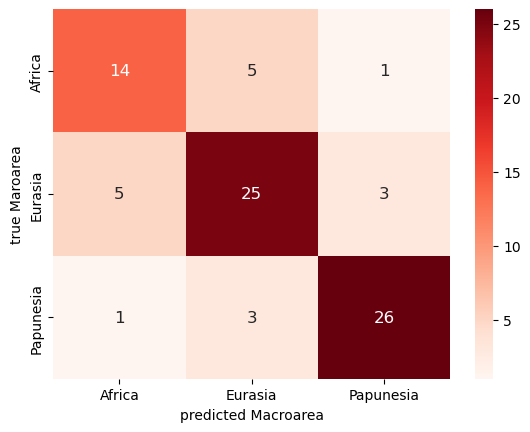

0.7831325301204819


In [12]:

labels = np.unique(y_test)

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', annot_kws={"size": 12},
            xticklabels=labels, yticklabels=labels)
plt.xlabel('predicted Macroarea')
plt.ylabel('true Maroarea')
plt.show()

print(accuracy_score(y_test, y_pred))

In [13]:
np.where(y_pred != y_test)
feature_df = pd.merge(l_df[['Glottocode', 'Latitude', 'Longitude', 'Glottolog_Name']], feature_df, on=['Glottocode'], how='right')
feature_df.iloc[np.where(y_pred != y_test)].head(10)

Glottocode  Latitude  Longitude          Glottolog_Name Macroarea  \
3    nyam1276  -5.08559   32.94452                Nyamwezi    Africa   
8    khva1239  42.27430   45.99770     Khwarshi-Inkhoqwari   Eurasia   
9    avar1256  41.70470   46.55800                    Avar   Eurasia   
16   budu1248  41.22720   48.33530                  Budukh   Eurasia   
22   ghod1238  42.74280   46.22520                Godoberi   Eurasia   
24   hunz1247  42.08080   46.13690                  Hunzib   Eurasia   
32   bezh1248  42.12060   46.03320                  Bezhta   Eurasia   
44   prus1238  52.39400   14.75700            Old Prussian   Eurasia   
46   tosk1239  41.00000   20.00000  Northern Tosk Albanian   Eurasia   
48   haus1257  11.15130    8.78040                   Hausa    Africa   

               Family Agriculture and vegetation:Agriculture and vegetation  \
3      Atlantic-Congo                                                  0      
8   Nakh-Daghestanian                                                  4      
9   Nakh-Daghestanian                                                 12      
16  Nakh-Daghestanian                                                  1      
22  Nakh-Daghestanian                                                  4      
24  Nakh-Daghestanian                                                  3      
32  Nakh-Daghestanian                                                  8      
44      Indo-European                                                  0      
46      Indo-European                                                  4      
48       Afro-Asiatic                                                  3      

   Agriculture and vegetation:Animals  \
3                                   0   
8                                   0   
9                                   2   
16                                  0   
22                                  1   
24                                  0   
32                                  1   
44                                  0   
46                                  0   
48                                  1   

   Agriculture and vegetation:Basic actions and technology  \
3                                                   1        
8                                                   0        
9                                                   1        
16                                                  0        
22                                                  1        
24                                                  0        
32                                                  0        
44                                                  0        
46                                                  2        
48                                                  3        

   Agriculture and vegetation:Clothing and grooming  ... Number:Number  \
3                                                 0  ...             0   
8                                                 0  ...             0   
9                                                 1  ...             0   
16                                                0  ...             0   
22                                                0  ...             0   
24                                                0  ...             0   
32                                                1  ...             0   
44                                                0  ...             0   
46                                                0  ...             0   
48                                                0  ...             0   

   Number:Other Number:Person/Thing Number:Property Other:Other  \
3             0                   0               0           2   
8             0                   1               0           1   
9             1                   1               0          17   
16            2                   0               0           2   
22            0                   1               0    

In [14]:
df_y = pd.DataFrame(y_test)
df_y['pred'] = y_pred
df_y = df_y.sort_index()
df_y.head()

Macroarea       pred
4     Africa  Papunesia
5     Africa    Eurasia
7    Eurasia     Africa
8    Eurasia    Eurasia
12   Eurasia    Eurasia

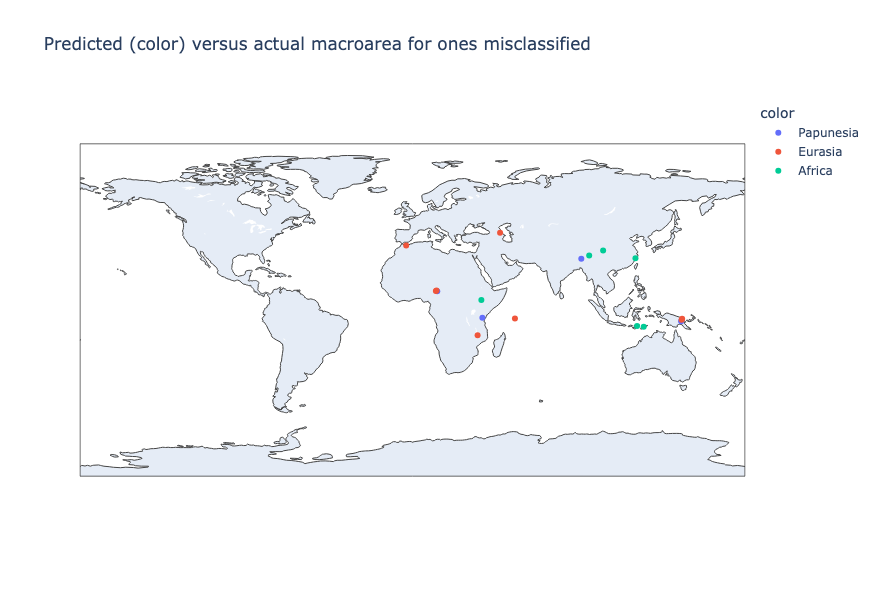

In [15]:
fig = px.scatter_geo(feature_df[feature_df.index.isin(list(df_y[df_y.Macroarea != df_y.pred].index))], lat='Latitude', lon='Longitude', color=df_y[df_y.Macroarea != df_y.pred].pred,
                     hover_name='Family', #size=... could use to show number of concepts per lang,
                     title='Predicted (color) versus actual macroarea for ones misclassified', width=870, height=600)
fig.show()

### Random Forest

In [16]:
clf = RandomForestClassifier(max_depth=3, random_state=0)
y_pred = clf.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

0.6385542168674698


[Text(0.4583333333333333, 0.875, 'Basic actions and technology:Possession <= 0.5\ngini = 0.602\nsamples = 75\nvalue = [26, 67, 31]\nclass = Eurasia'),
 Text(0.25, 0.625, 'Kinship:Quantity <= 1.5\ngini = 0.663\nsamples = 56\nvalue = [24, 30, 31]\nclass = Papunesia'),
 Text(0.16666666666666666, 0.375, 'Cognition:Emotions and values <= 0.5\ngini = 0.658\nsamples = 55\nvalue = [21, 30, 31]\nclass = Papunesia'),
 Text(0.08333333333333333, 0.125, 'gini = 0.658\nsamples = 49\nvalue = [21, 21, 29]\nclass = Papunesia'),
 Text(0.25, 0.125, 'gini = 0.298\nsamples = 6\nvalue = [0, 9, 2]\nclass = Eurasia'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [3, 0, 0]\nclass = Africa'),
 Text(0.6666666666666666, 0.625, 'The body:The physical world <= 1.5\ngini = 0.097\nsamples = 19\nvalue = [2, 37, 0]\nclass = Eurasia'),
 Text(0.5, 0.375, 'Food and drink:Food and drink <= 1.5\ngini = 0.054\nsamples = 17\nvalue = [1, 35, 0]\nclass = Eurasia'),
 Text(0.4166666666666667, 0.125, 'gini = 

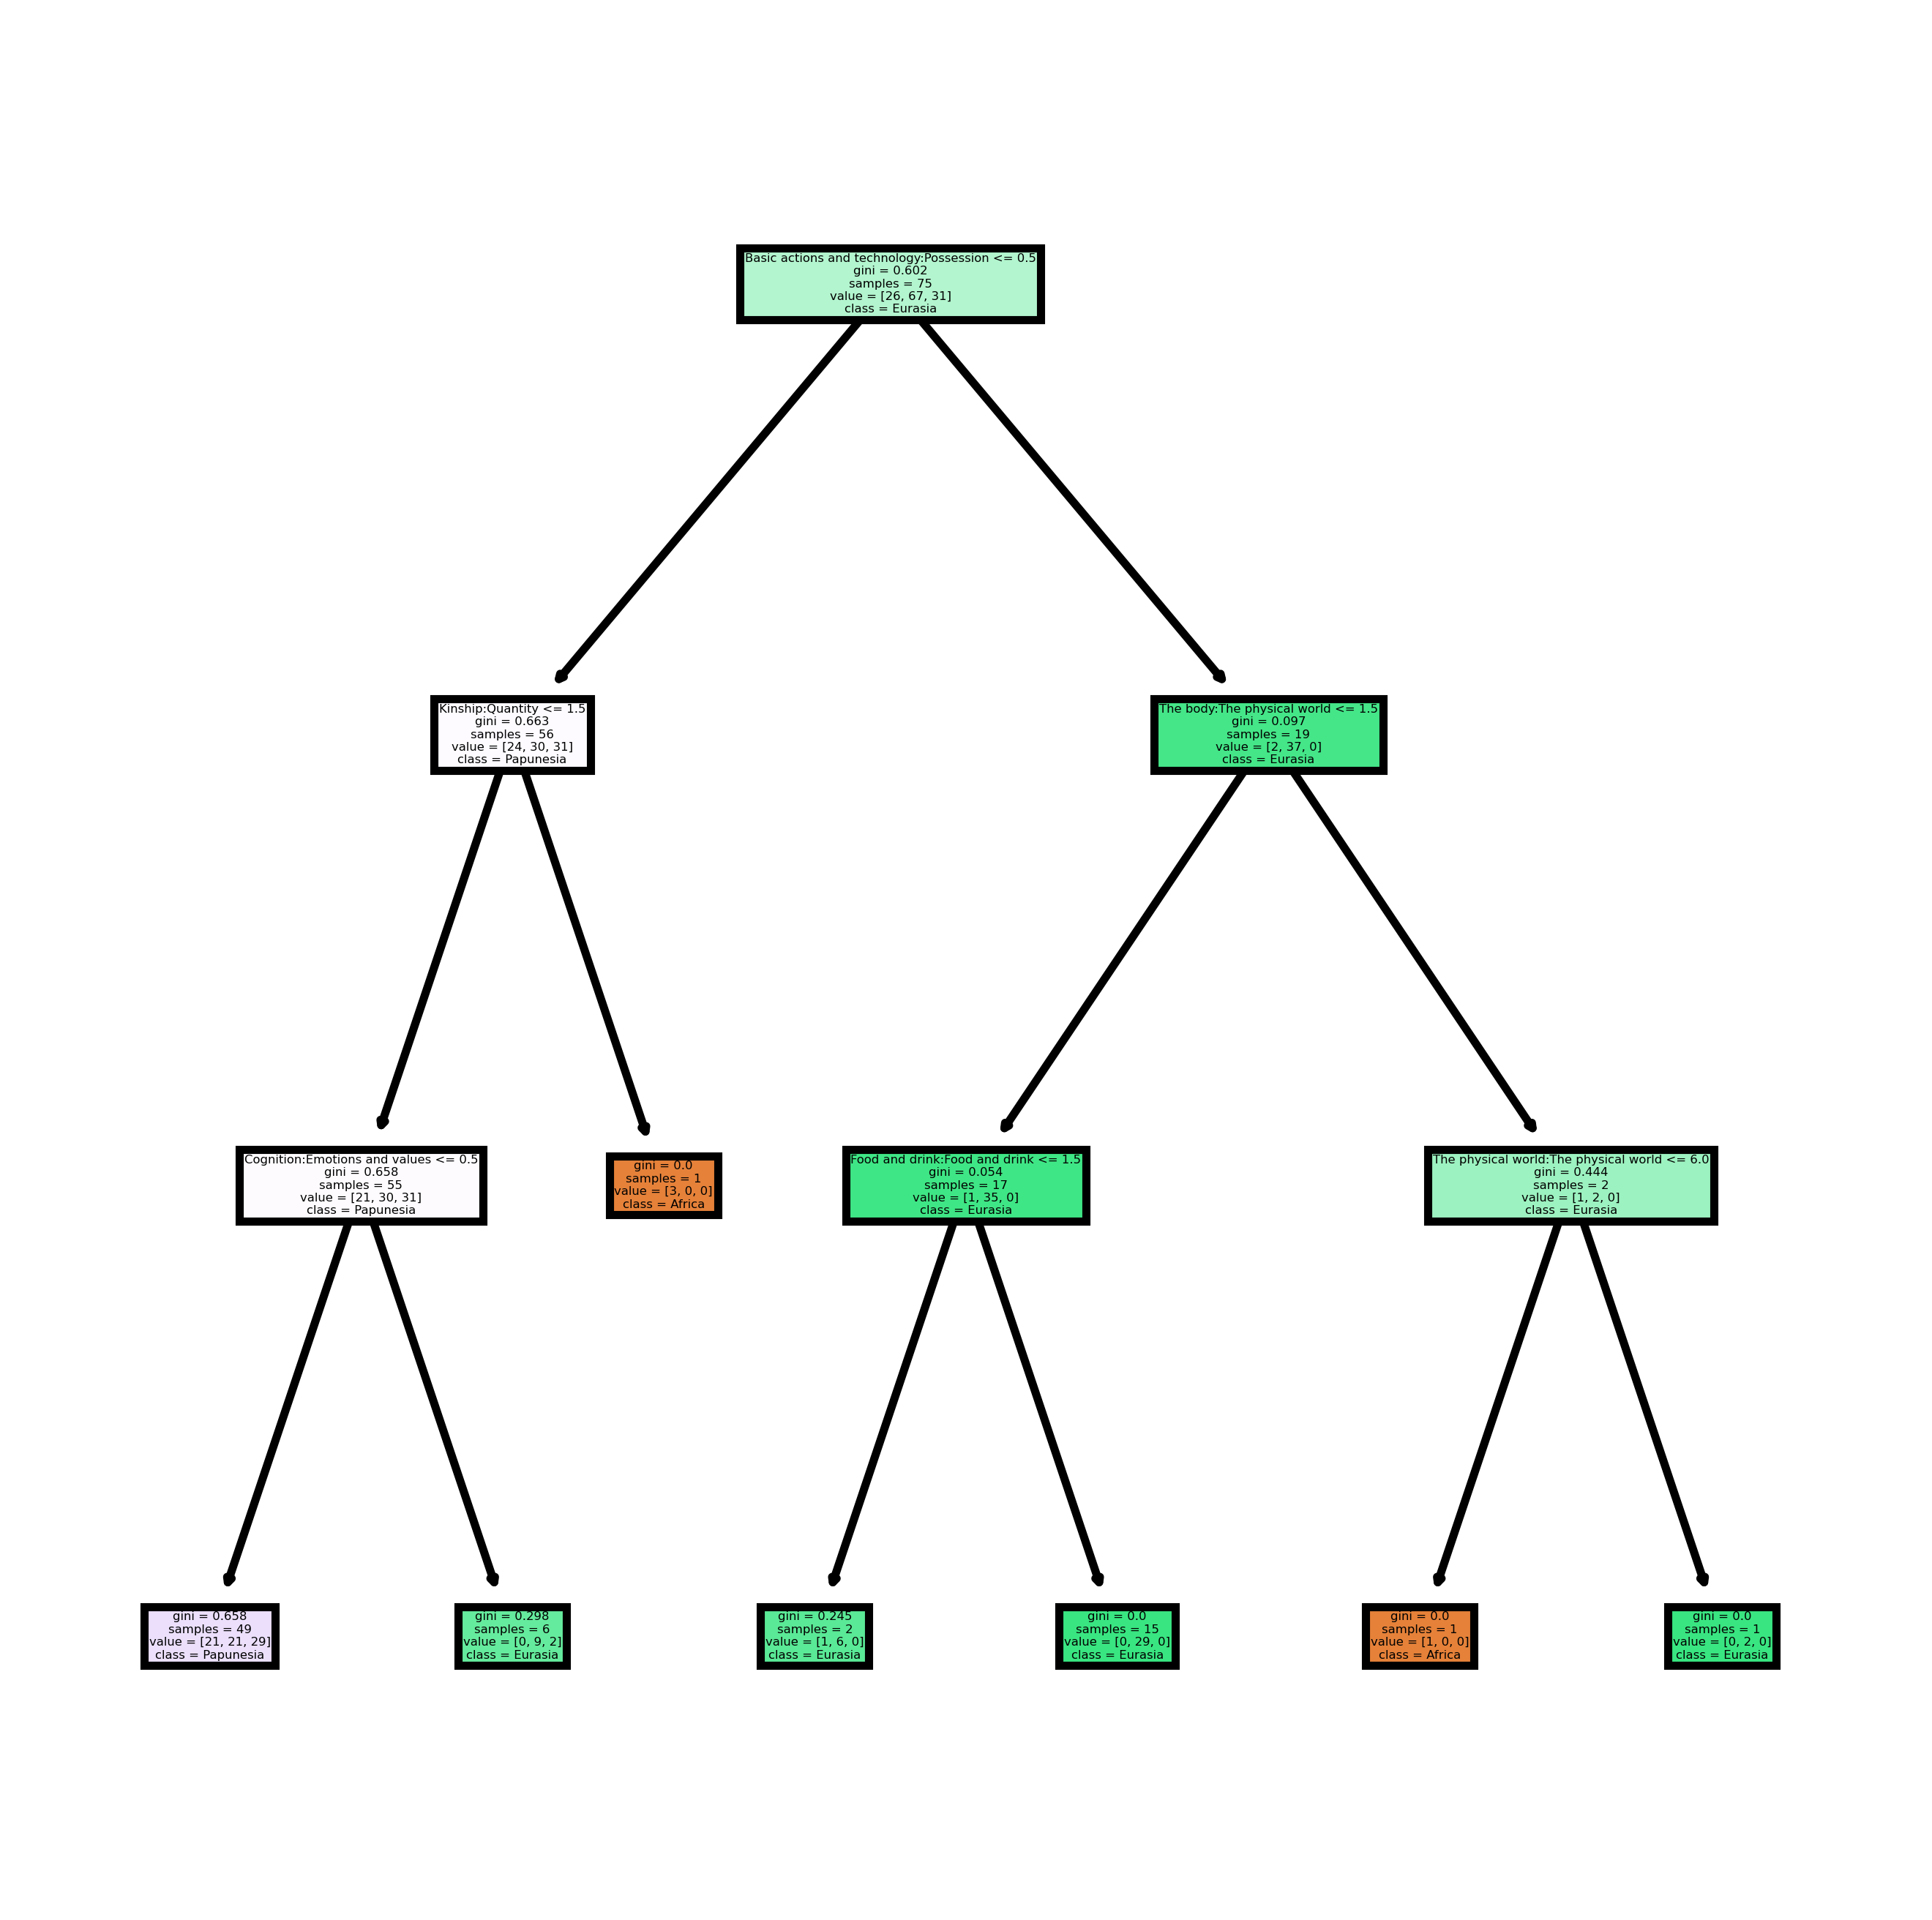

In [17]:
from sklearn import tree
fn=X_test.columns.values.tolist()
cn=list(np.unique(y_test))
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(clf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True)

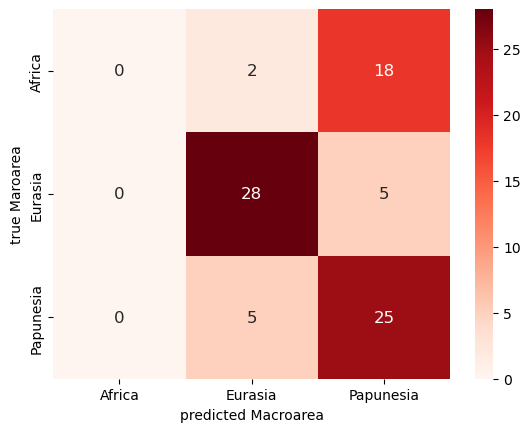

0.6385542168674698


In [18]:
labels = np.unique(y_test)

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', annot_kws={"size": 12},
            xticklabels=labels, yticklabels=labels)
plt.xlabel('predicted Macroarea')
plt.ylabel('true Maroarea')
plt.show()

print(accuracy_score(y_test, y_pred))

## Clustering with K-means, 3 clusters
There are 3 macroareas, let's see if clustering gives regions that look like the macroareas

In [19]:
from sklearn.cluster import KMeans
X_train = X_train.loc[X_train.index < 207]
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto")
kmeans.fit(X_train)


KMeans(n_clusters=3, n_init='auto', random_state=0)

In [20]:
kmeans.labels_

array([1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 1], dtype=int32)

In [21]:
y_train = y_train.loc[y_train.index < 207]

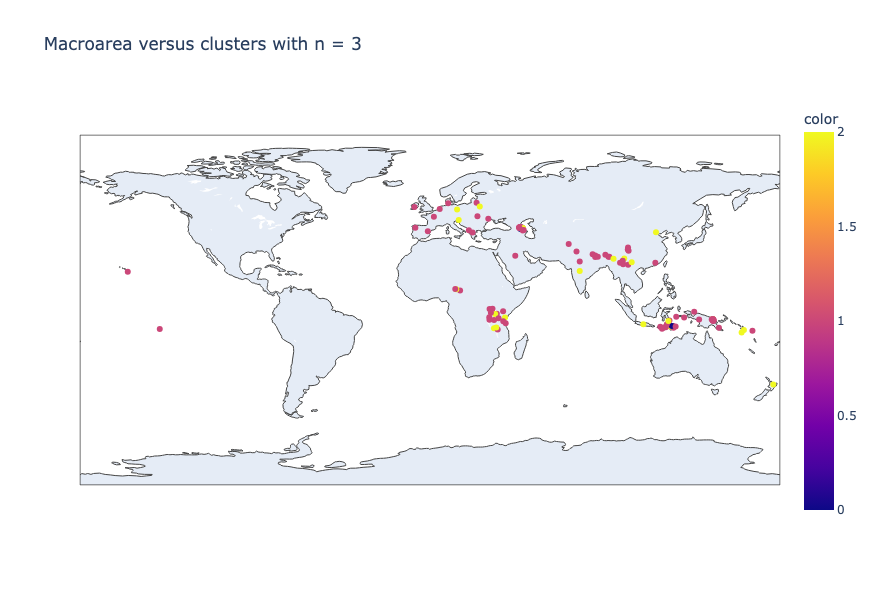

In [22]:

df_y2 = pd.DataFrame(y_train)
df_y2 = df_y2.sort_index()
fig = px.scatter_geo(feature_df[feature_df.index.isin(list(df_y2.index))], lat='Latitude', lon='Longitude', color=kmeans.labels_,
                     hover_name='Glottolog_Name', #size=... could use to show number of concepts per lang,
                     title='Macroarea versus clusters with n = 3', width=870, height=600)
fig.show()

This looks a bit like the language families? Let's turn to them now

## semantic field as X, language family as y
### Naive Bayes

In [23]:
X_train, X_test, y_train, y_test = train_test_split(feature_df.loc[:,'Agriculture and vegetation:Agriculture and vegetation':'Warfare and hunting:Warfare and hunting']
                                                    , feature_df.Family, test_size=0.4, random_state=0)
y_pred = mnb.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

0.7349397590361446


In [24]:
print_top(list(feature_df.columns.values.tolist())[3:303], mnb, 5)

Afro-Asiatic: Food_and_drink:The_physical_world, Speech_and_language:The_physical_world, Social_and_political_relations:The_physical_world, The_house:The_physical_world, Emotions_and_values:The_physical_world
Atlantic-Congo: Animals:The_physical_world, Speech_and_language:The_physical_world, The_house:The_physical_world, Food_and_drink:The_physical_world, Agriculture_and_vegetation:The_physical_world
Austronesian: Speech_and_language:The_physical_world, Food_and_drink:The_physical_world, The_house:The_physical_world, Animals:The_physical_world, Social_and_political_relations:Warfare_and_hunting
Indo-European: Food_and_drink:The_physical_world, Speech_and_language:The_physical_world, Agriculture_and_vegetation:The_physical_world, The_house:The_physical_world, Social_and_political_relations:The_physical_world
Nakh-Daghestanian: Food_and_drink:The_physical_world, Speech_and_language:The_physical_world, Agriculture_and_vegetation:The_physical_world, Emotions_and_values:The_physical_world, 

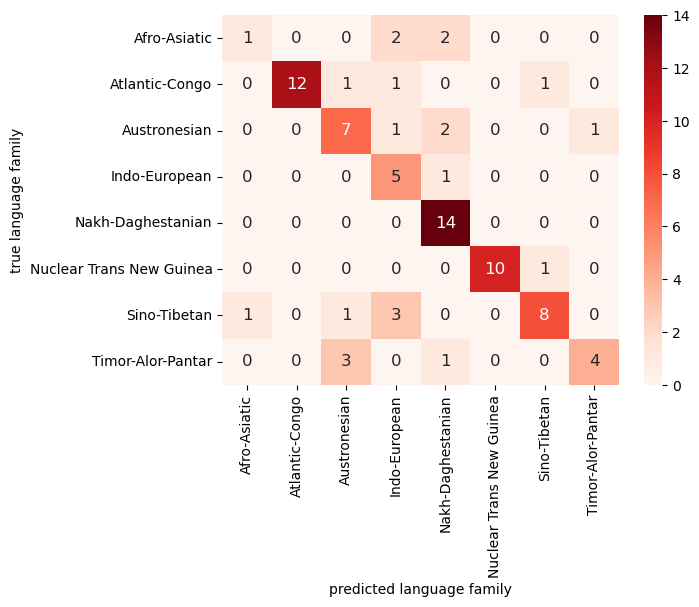

In [25]:
labels = np.unique(y_test)

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', annot_kws={"size": 12},
            xticklabels=labels, yticklabels=labels)
plt.xlabel('predicted language family')
plt.ylabel('true language family')
plt.show()

In [26]:
df_y3 = pd.DataFrame(y_test)
df_y3['pred'] = y_pred
df_y3 = df_y3.sort_index()
df_y3.head()

Family               pred
4      Atlantic-Congo       Sino-Tibetan
5      Atlantic-Congo      Indo-European
7        Sino-Tibetan       Sino-Tibetan
8   Nakh-Daghestanian  Nakh-Daghestanian
12  Nakh-Daghestanian  Nakh-Daghestanian

In [27]:
df_y3[df_y3.Family != df_y3.pred].index

Index([  4,   5,  51,  52,  60,  61,  63,  74,  80, 116, 130, 131, 134, 135,
       137, 169, 171, 173, 178, 180, 181, 183],
      dtype='int64')

In [28]:
df_y3[df_y3.Family != df_y3.pred].pred

4           Sino-Tibetan
5          Indo-European
51         Indo-European
52     Timor-Alor-Pantar
60          Austronesian
61     Nakh-Daghestanian
63         Indo-European
74         Indo-European
80          Austronesian
116         Austronesian
130    Nakh-Daghestanian
131        Indo-European
134    Nakh-Daghestanian
135    Nakh-Daghestanian
137    Nakh-Daghestanian
169        Indo-European
171        Indo-European
173         Afro-Asiatic
178         Sino-Tibetan
180    Nakh-Daghestanian
181         Austronesian
183         Austronesian
Name: pred, dtype: object

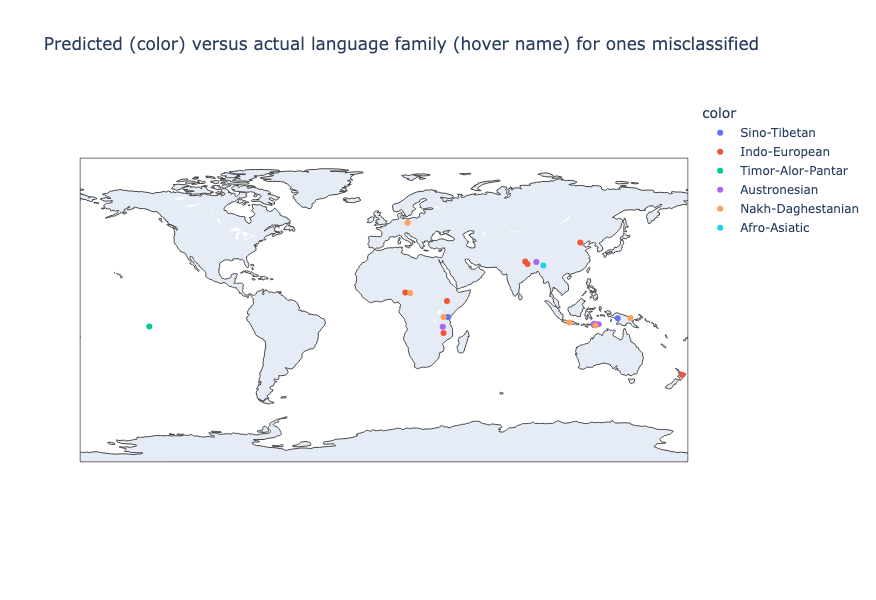

In [29]:

fig = px.scatter_geo(feature_df[feature_df.index.isin(list(df_y3[df_y3.Family != df_y3.pred].index))], lat='Latitude', lon='Longitude', color=df_y3[df_y3.Family != df_y3.pred].pred,
                     hover_name='Family', #size=... could use to show number of concepts per lang,
                     title='Predicted (color) versus actual language family (hover name) for ones misclassified', width=870, height=600)
fig.show()

## Clustering with K-means, 8 clusters
There are 8 language families, let's see if 8 clsters would give results that look anything like the families.

In [30]:
X_train = X_train.loc[X_train.index < 207]
kmeans = KMeans(n_clusters=8, random_state=0, n_init="auto")
kmeans.fit(X_train)

KMeans(n_init='auto', random_state=0)

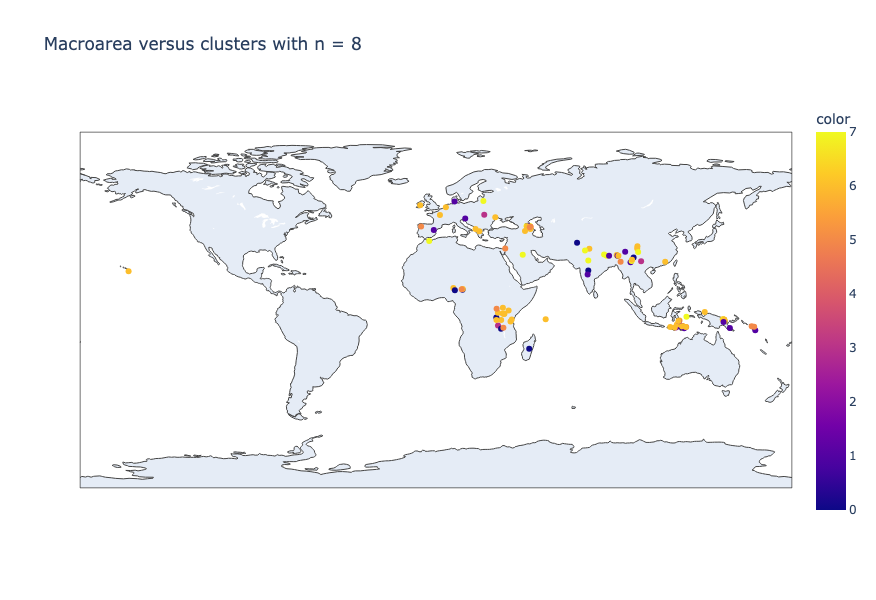

In [31]:
y_train = y_train.loc[y_train.index < 207]
df_y4 = pd.DataFrame(y_train)
df_y4 = df_y4.sort_index()
fig = px.scatter_geo(feature_df[feature_df.index.isin(list(df_y4.index))], lat='Latitude', lon='Longitude', color=kmeans.labels_,
                     hover_name='Glottolog_Name', #size=... could use to show number of concepts per lang,
                     title='Macroarea versus clusters with n = 8', width=870, height=600)
fig.show()

[back to top](#Final-Progress-Report)